In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import astropy

In [ ]:
#Function to normalise a histogram to a pdf
def hist_norm(tedges, tcounts):
    t=0
    for i in range(len(tcounts)):
       t += (tedges[i+1]-tedges[i])*tcounts[i]
    return tcounts/t

In [3]:
#We import the data
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

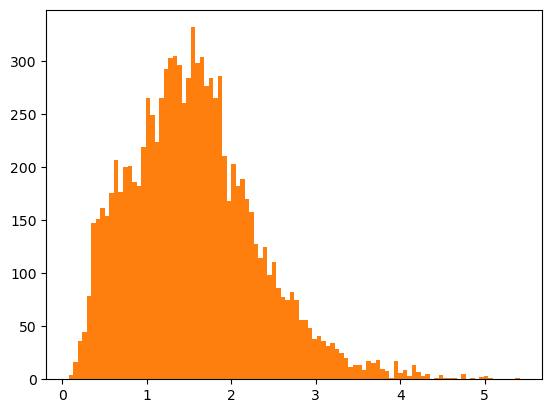

In [4]:
real_counts=plt.hist(z, 100)[0]
edges=plt.hist(z, 100)[1]

# Rejection sampling

In [8]:
#Sampling time!
N=1000 #Arbitrary number of generated points
x=0 #Initialise the x (z) coordinate
y=0 #Initialise the y (counts) coordinate
rej_data=[] #Where to save the generated data
rej_y=[] #Just to make the cool plot original histogram vs scattered generated numbers
for i in range(len(real_counts)): #It moves along the bins
    for j in range(N): #It generates N number for each bin
        x=np.random.uniform(edges[i], edges[i+1])
        y=np.random.uniform(min(real_counts), max(real_counts))
        if y < real_counts[i]:
            rej_data.append(x)
            rej_y.append(y)

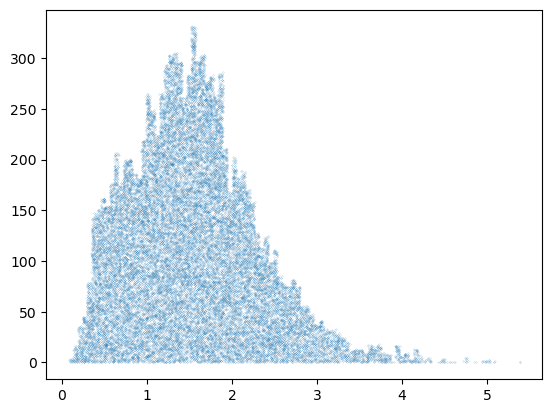

In [9]:
plt.scatter(rej_data, rej_y, s=0.01)

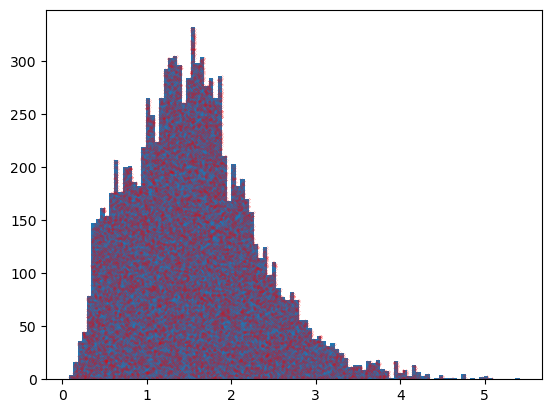

In [10]:
#Let's compare them
plt.hist(z, 100)
plt.scatter(rej_data, rej_y, s=0.01, color='red')

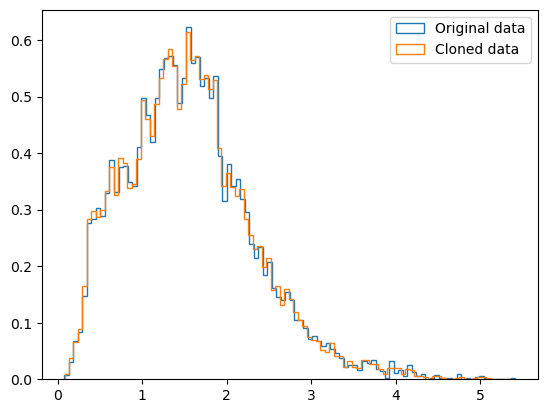

In [11]:
#Visual comparison
plt.hist(z, 100, histtype='step',density=True, label = 'Original data')
rej_counts=plt.hist(rej_data,100, histtype='step',density=True, label = 'Cloned data')[0]
plt.legend()
plt.show()

In [12]:
#We want to see the difference between the two histograms
diff_counts=np.abs(hist_norm(edges, real_counts) - hist_norm(edges, rej_counts)) 

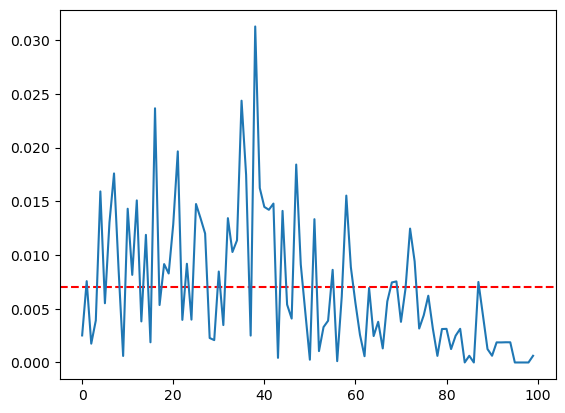

In [13]:
#Once normalised, the two distributions are pretty similar
plt.axhline(y=np.mean(diff_counts), color='r', linestyle='--')
plt.plot(diff_counts) 

# Reverse sampling

In [15]:
#Find the mid location of the bins
edges_mids = (edges[1:] + edges[:-1]) / 2

In [16]:
#Obtain the CDF with normalisation
cdf=np.cumsum(real_counts)/np.sum(real_counts) 

In [17]:
cdf

array([4.000e-04, 2.000e-03, 5.600e-03, 1.010e-02, 1.800e-02, 3.270e-02,
       4.780e-02, 6.400e-02, 7.940e-02, 9.700e-02, 1.177e-01, 1.354e-01,
       1.554e-01, 1.755e-01, 1.941e-01, 2.123e-01, 2.342e-01, 2.607e-01,
       2.856e-01, 3.080e-01, 3.345e-01, 3.638e-01, 3.941e-01, 4.246e-01,
       4.542e-01, 4.803e-01, 5.087e-01, 5.419e-01, 5.717e-01, 6.021e-01,
       6.298e-01, 6.582e-01, 6.847e-01, 7.133e-01, 7.344e-01, 7.512e-01,
       7.715e-01, 7.897e-01, 8.086e-01, 8.256e-01, 8.414e-01, 8.542e-01,
       8.656e-01, 8.781e-01, 8.879e-01, 8.990e-01, 9.076e-01, 9.154e-01,
       9.229e-01, 9.311e-01, 9.386e-01, 9.442e-01, 9.498e-01, 9.546e-01,
       9.584e-01, 9.625e-01, 9.661e-01, 9.692e-01, 9.726e-01, 9.755e-01,
       9.780e-01, 9.800e-01, 9.812e-01, 9.825e-01, 9.838e-01, 9.847e-01,
       9.864e-01, 9.879e-01, 9.897e-01, 9.907e-01, 9.915e-01, 9.916e-01,
       9.933e-01, 9.939e-01, 9.948e-01, 9.951e-01, 9.964e-01, 9.971e-01,
       9.974e-01, 9.979e-01, 9.979e-01, 9.980e-01, 

In [18]:
#Obtain an interpolation for the CDF
tck = scipy.interpolate.interp1d(cdf, edges_mids)

In [19]:
#Sample according to an uniform distribution and interpolate
u = np.random.uniform(min(cdf),max(cdf), 10000) #Set the range of generation 
mock_data = tck(u)

(array([  7.,  24.,  44.,  51., 107., 158., 152., 176., 186., 227., 189.,
        192., 205., 200., 184., 206., 243., 273., 217., 279., 271., 288.,
        283., 330., 266., 276., 303., 327., 283., 264., 287., 258., 264.,
        234., 193., 191., 180., 198., 173., 163., 143., 139., 120., 113.,
        124.,  75.,  63.,  71.,  77.,  74.,  44.,  63.,  46.,  38.,  52.,
         38.,  31.,  41.,  44.,  30.,  25.,  14.,  18.,  13.,   9.,  11.,
         21.,  12.,  18.,   2.,   7.,   3.,   8.,   7.,   5.,  12.,  10.,
          6.,   5.,   2.,   0.,   1.,   5.,   0.,   0.,   0.,   2.,   1.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   3.,
          0.]),
 array([0.0802    , 0.133533  , 0.186866  , 0.240199  , 0.29353198,
        0.346865  , 0.40019798, 0.453531  , 0.50686401, 0.560197  ,
        0.61352998, 0.66686296, 0.72019601, 0.77352899, 0.82686198,
        0.88019496, 0.93352795, 0.98686099, 1.04019392, 1.09352696,
        1.14686   , 1.20019293, 1.25352597, 1.

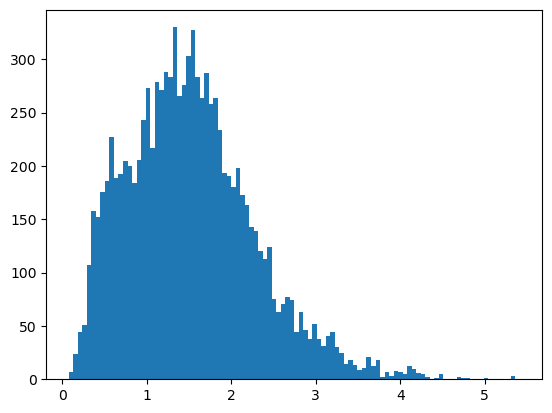

In [20]:
plt.hist(mock_data, edges)

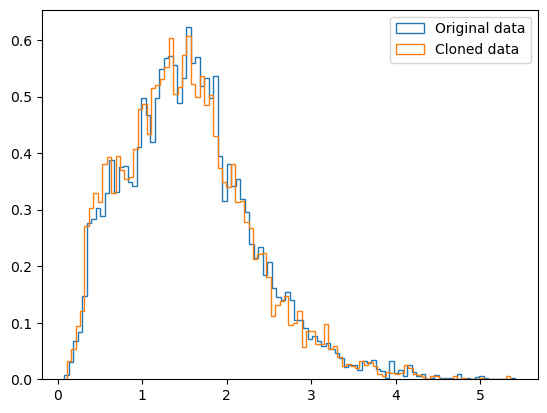

In [21]:
#Visual comparison
plt.hist(z, 100, histtype='step',density=True, label = 'Original data')
rev_counts=plt.hist(mock_data,100, histtype='step',density=True, label = 'Cloned data')[0]
plt.legend()
plt.show()

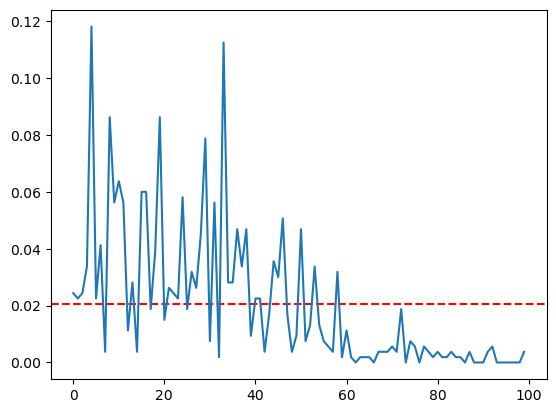

In [22]:
#We want to see the difference between the two histograms
diff_counts=np.abs(hist_norm(edges, real_counts) - hist_norm(edges, rev_counts)) 
plt.axhline(y=np.mean(diff_counts), color='r', linestyle='--')
plt.plot(diff_counts) 

# Cosmology

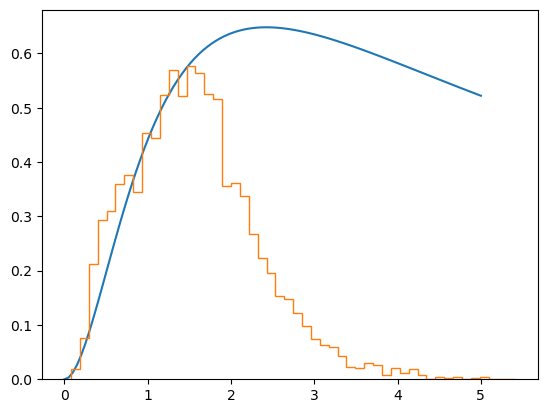

In [24]:
astropy.cosmology.Planck18
z_vals = np.linspace(0,5,100)
comvol = astropy.cosmology.Planck18.differential_comoving_volume(z_vals).value
grid = np.linspace(0,5,100)
plt.plot(grid,comvol/6.5e10) ###   Arbitrary normalization, just matching by eye

plt.hist(z,bins=50,histtype='step',density=True,label='original data');